# **Minor Project 2: Student Performance and Attendance Analyzer**

**Problem Statement**

Educational institutions collect student data but often do not fully use it to understand how attendance and classroom engagement affect academic performance. This project analyzes student GPA and CGPA along with attendance and participation data to identify patterns that influence academic outcomes. The goal is to understand how student behavior relates to performance and to support better, data-driven academic decisions.

Dataset: Student Academic Performance.xlsx

In [23]:
# Loading the Dataset
import pandas as pd

import numpy as np

df = pd.read_excel('Dataset.xlsx')
df

,Name,Gender,Phone Number,State Of Birth,Email,Student ID,Qualification,Course,Semester,GPA,CGPA,Raised Hands,Visited Resource,Announcements Visited,Discussion,Absence Days Under-7
0,Lum Meu Mel,F,010-981 7433,Penang,meumel32@yahoo.com,21PMD30001,Degree,Hotel Management,S,3.958,3.817,43,47,42,36,1
1,Eric Hew Law Toh,M,019-752 8050,Kedah,law03toh@hotmail.com,21PMD30002,Diploma,Accounting,F,3.065,3.182,9,15,13,10,0
2,Hao Lin Min,F,019-455 0808,Perak,hoa32@crooks.org,21PMD30003,Degree,Information Technology,S,2.984,3.091,7,12,11,9,0
3,Cheng Zheng Xun,M,016-375 8448,Penang,zheng1xun@gmail.com,21PMD30004,Diploma,Computer Science,F,2.820,2.606,8,6,7,8,0
4,Eunice Cheong En Hui,F,014-550 5401,Kedah,enhui12@gmail.com,21PMD30005,Degree,Business,F,3.621,3.752,31,29,28,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Fan Zheng En,M,015-528 3498,Penang,zhengenfan47@gmail.com,21PMD30096,Diploma,Business,F,3.517,3.456,32,31,31,34,1
96,Poon Cheng Boon,M,013-624 3736,Kedah,chengboon@yahoo.com,21PMD30097,Diploma,Information Technology,S,3.564,3.659,35,36,36,37,1
97,Lin Jun Feng,M,016-320 1977,Kedah,fenglinfeng@hotmail.com,21PMD30098,Degree,Human Resource Manager,F,3.021,2.987,11,12,12,9,0
98,Lew Zhi Xin,F,010-767 6603,Penang,zhixin89@yahoo.com,21PMD30099,Degree,Human Resource Manager,F,4.000,3.901,47,48,48,49,1


*# Inspecting and cleaning the data *

In [24]:
print(f"The shape of the dataset is {df.shape}.")

The shape of the dataset is (100, 16).


In [25]:
print(f"The Columns in the Dataset are {df.columns}.")

The Columns in the Dataset are Index(['Name', 'Gender', 'Phone Number', 'State Of Birth', 'Email',
       'Student ID', 'Qualification', 'Course', 'Semester', 'GPA', 'CGPA',
       'Raised Hands', 'Visited Resource', 'Announcements Visited',
       'Discussion', 'Absence Days Under-7'],
      dtype='object').


In [26]:
print(f"The data type of the dataset is {df.dtypes}.")

The data type of the dataset is Name                      object
Gender                    object
Phone Number              object
State Of Birth            object
Email                     object
Student ID                object
Qualification             object
Course                    object
Semester                  object
GPA                      float64
CGPA                     float64
Raised Hands              object
Visited Resource           int64
Announcements Visited      int64
Discussion                 int64
Absence Days Under-7       int64
dtype: object.


In [27]:
print(f"The information of the dataset is {df.info()}.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   100 non-null    object 
 1   Gender                 100 non-null    object 
 2   Phone Number           100 non-null    object 
 3   State Of Birth         100 non-null    object 
 4   Email                  100 non-null    object 
 5   Student ID             100 non-null    object 
 6   Qualification          100 non-null    object 
 7   Course                 100 non-null    object 
 8   Semester               100 non-null    object 
 9   GPA                    100 non-null    float64
 10  CGPA                   100 non-null    float64
 11  Raised Hands           100 non-null    object 
 12  Visited Resource       100 non-null    int64  
 13  Announcements Visited  100 non-null    int64  
 14  Discussion             100 non-null    int64  
 15  Absence

In [28]:
print(f"The basic stats of the dataset is {df.describe()}.")

The basic stats of the dataset is               GPA        CGPA  Visited Resource  Announcements Visited  \
count  100.000000  100.000000         100.00000             100.000000   
mean     3.351890    3.297080          24.93000              24.570000   
std      0.359059    0.386223          12.07406              12.221239   
min      2.323000    2.319000           3.00000               3.000000   
25%      3.116000    3.086750          13.75000              12.000000   
50%      3.333000    3.335000          26.00000              25.000000   
75%      3.612750    3.562000          34.25000              35.000000   
max      4.000000    3.939000          48.00000              50.000000   

       Discussion  Absence Days Under-7  
count  100.000000            100.000000  
mean    24.620000              0.740000  
std     12.933224              0.440844  
min      0.000000              0.000000  
25%     11.000000              0.000000  
50%     25.500000              1.000000  
75%  

In [29]:
# Checking for the null values in the Dataset
print(df.isnull().sum())

Name                     0
Gender                   0
Phone Number             0
State Of Birth           0
Email                    0
Student ID               0
Qualification            0
Course                   0
Semester                 0
GPA                      0
CGPA                     0
Raised Hands             0
Visited Resource         0
Announcements Visited    0
Discussion               0
Absence Days Under-7     0
dtype: int64


In [30]:
# to fill all null values using mean / median /mode. But in this case let us assume mean for filling the null values in 'Announcements Visited' column.

df['Announcements Visited'].fillna(df['Announcements Visited'].mean(), inplace=True)

df.isnull().sum()

#But in this dataset , there are no null values so the values remain the same.

/tmp/ipython-input-1939208017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Announcements Visited'].fillna(df['Announcements Visited'].mean(), inplace=True)


,0
Name,0
Gender,0
Phone Number,0
State Of Birth,0
Email,0
Student ID,0
Qualification,0
Course,0
Semester,0
GPA,0


 *# Analysing overall performance statistics*

In [31]:
df[["GPA", "CGPA"]].describe()

,GPA,CGPA
count,100.000000,100.000000
mean,3.351890,3.297080
std,0.359059,0.386223
min,2.323000,2.319000
25%,3.116000,3.086750
50%,3.333000,3.335000
75%,3.612750,3.562000
max,4.000000,3.939000


Minimum and maximum values of GPA and CGPA were calculated to understand the academic performance range of students

In [32]:
df[["GPA", "CGPA"]].min()
df[["GPA", "CGPA"]].max()



,0
GPA,4.000
CGPA,3.939


*# Perform group-based analysis (by subject or attendance)*

Group-based analysis was performed using the groupby() function to compare GPA and CGPA across courses, attendance levels, qualification types, and semesters. This helped identify patterns in academic performance related to attendance and subject area.

In [33]:
df.groupby("Course")[["GPA", "CGPA"]].mean()
df.groupby("Absence Days Under-7")["GPA"].mean()

,GPA
Absence Days Under-7,
0,3.018269
1,3.469108


*# Visualize distributions and comparisons*

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

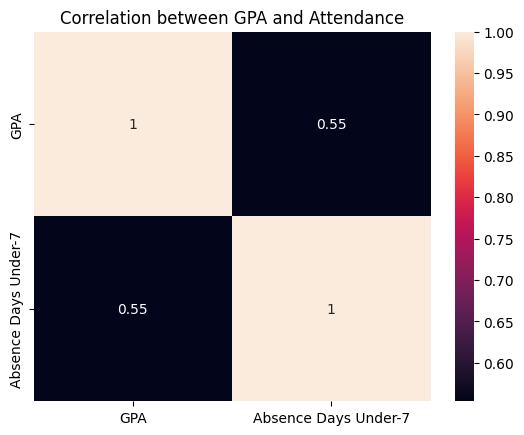

In [35]:
data = df[["GPA", "Absence Days Under-7"]].corr()

plt.figure()
sns.heatmap(data, annot=True)
plt.title("Correlation between GPA and Attendance")
plt.show()

A correlation heatmap is used here to analyze the relationship between GPA and attendance. The results indicate that attendance has a noticeable impact on academic performance, with fewer absence days generally associated with higher GPA

array([[<Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Visited Resource'}>,
        <Axes: title={'center': 'Announcements Visited'}>],
       [<Axes: title={'center': 'Discussion'}>,
        <Axes: title={'center': 'Absence Days Under-7'}>]], dtype=object)

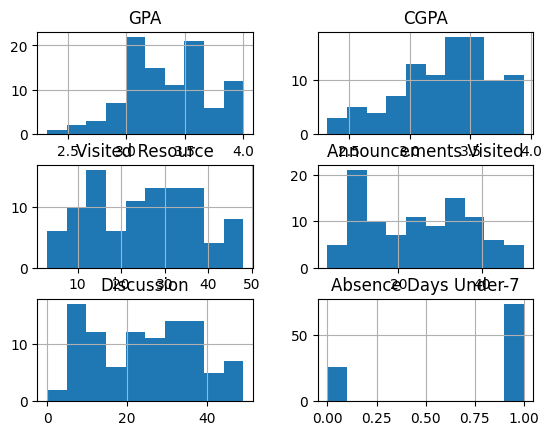

In [36]:
# This gives a quick overview of how student performance, engagement, and attendance data are distributed.
df.hist()

A histogram was used to visualize the distribution of GPA among students. This helped understand the overall academic performance pattern and identify common performance ranges.

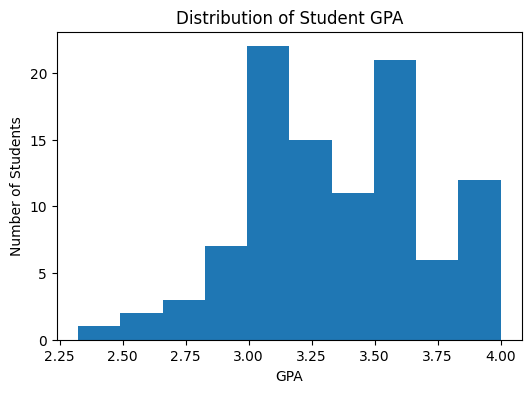

In [38]:
plt.figure(figsize=(6,4))

plt.hist(df["GPA"], bins=10)

plt.title("Distribution of Student GPA")
plt.xlabel("GPA")
plt.ylabel("Number of Students")

plt.show()

The box plot was used to compare GPA across different courses, highlighting differences in median performance and score variability among students

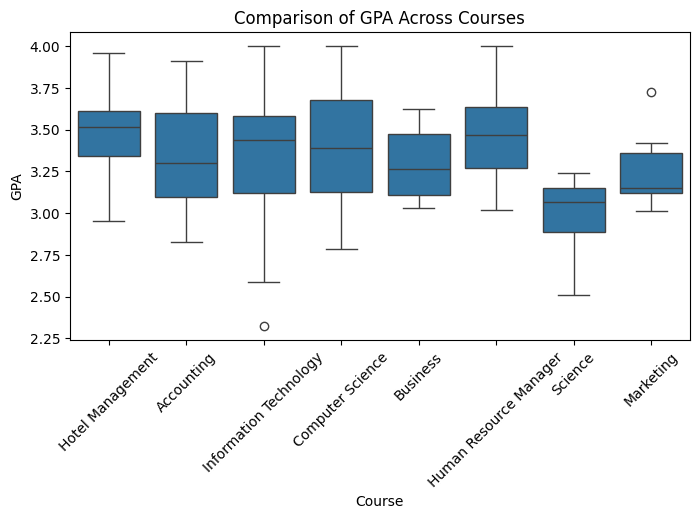

In [39]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Course", y="GPA", data=df)
plt.xticks(rotation=45)
plt.title("Comparison of GPA Across Courses")
plt.xlabel("Course")
plt.ylabel("GPA")
plt.show()

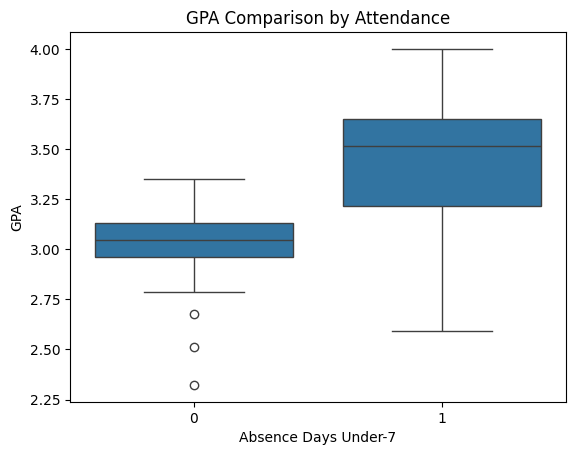

In [40]:
# for attendance comparisons too
sns.boxplot(x="Absence Days Under-7", y="GPA", data=df)
plt.title("GPA Comparison by Attendance")
plt.show()

*# Interpret results and academic insights*

**Interpretation and Academic Insights**

The analysis shows that student academic performance is strongly influenced by attendance and classroom engagement. Students with fewer absence days generally achieve higher GPA and CGPA, indicating a positive relationship between regular attendance and academic success. Course-wise comparisons reveal variations in performance, suggesting that certain subjects may require additional academic support. Engagement indicators such as participation in discussions and resource usage are also associated with better performance. Overall, the results highlight the importance of attendance, active participation, and timely academic interventions to improve student outcomes.

The findings confirm that consistent attendance and active student engagement play a crucial role in improving academic performance.